# Land/Sea Mask Apply

In [1]:
import cdms2
import vcs
import cdutil
import MV2
import genutil

/Users/lee1043/anaconda3/envs/cdat82_nightly_20200603_py37/lib/python3.8/site-packages/unidata/__init__.py:2: UserWarning: unidata package is deprecated please use genutil.udunits instead of unidata.udunits
  warnings.warn("unidata package is deprecated please use genutil.udunits instead of unidata.udunits")


## Load test data

In [2]:
f = cdms2.open('clt.nc')
d = f('clt')

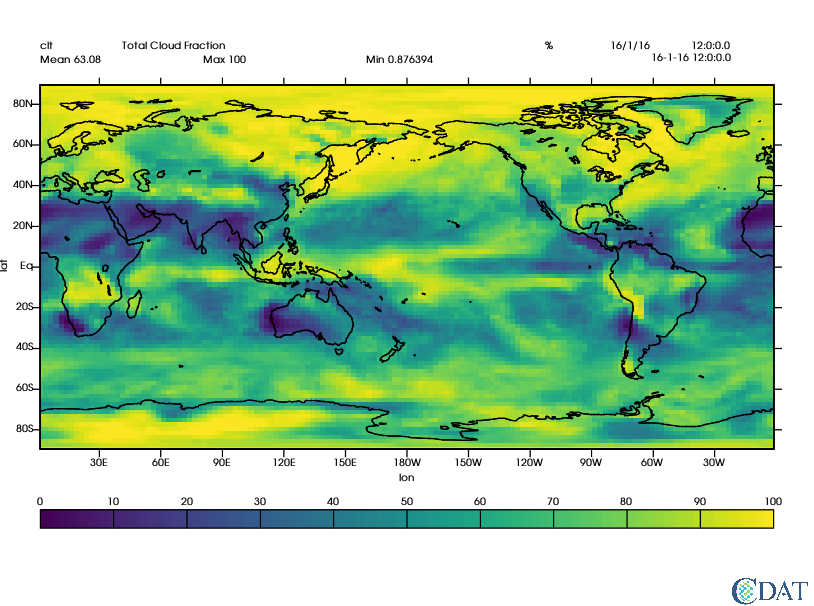

In [3]:
x = vcs.init()
x.clear()
x.plot(d)

## Generate Mask (0: ocean, 1: land)

In [4]:
mask = cdutil.generateLandSeaMask(d)

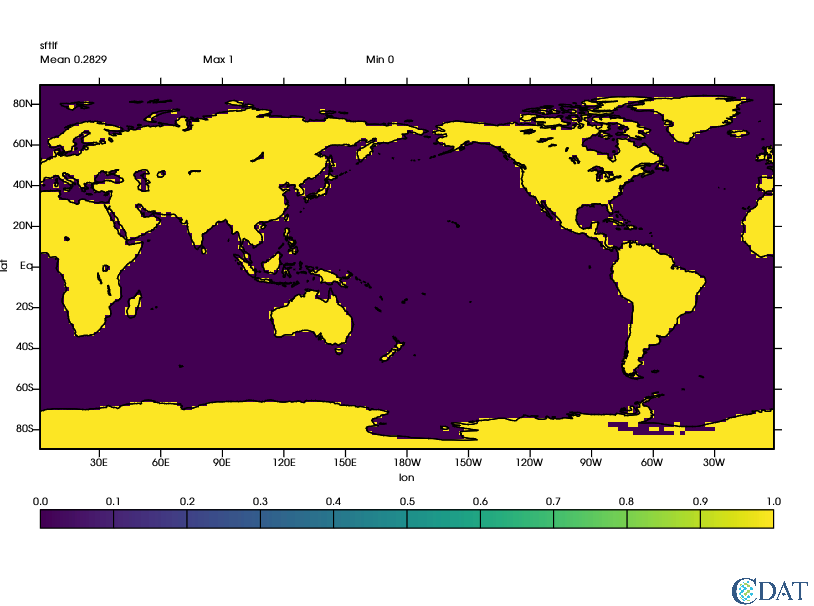

In [5]:
x.clear()
x.plot(mask)

## Match dimension using "grower" function

In [6]:
d, mask2 = genutil.grower(d, mask)
print(mask2.shape)

(60, 90, 144)


## Ocean grid (mask out land area)

In [7]:
d_ocean = MV2.masked_where(mask2, d)  # or "MV2.masked_where(mask2==1., d)"

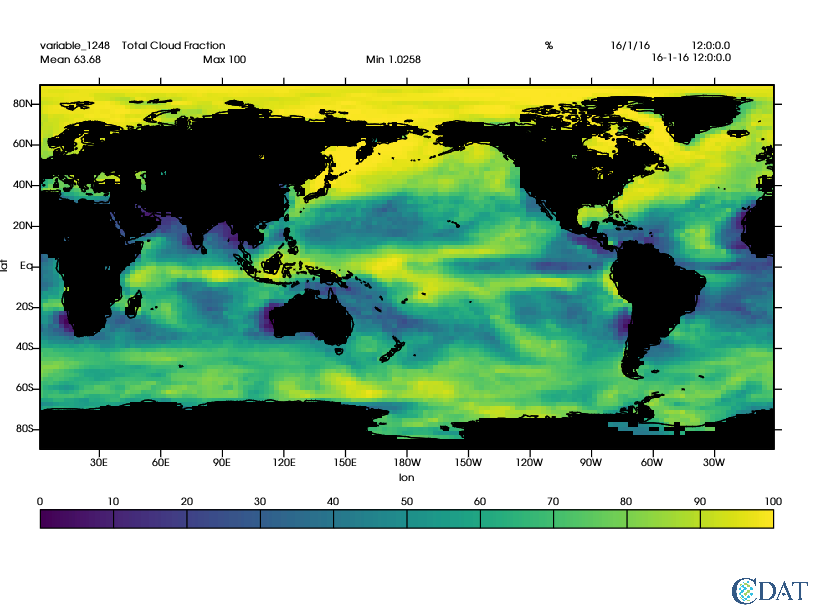

In [8]:
x.clear()
x.plot(d_ocean)

## Land grid (mask out ocean area)

In [9]:
d_land = MV2.masked_where(mask2==0., d)

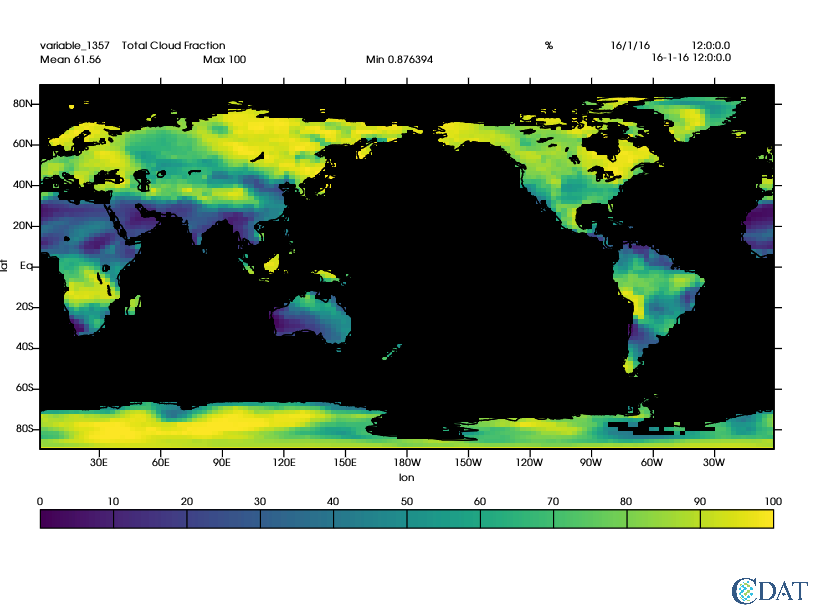

In [10]:
x.clear()
x.plot(d_land)